In [6]:
from keras.datasets import mnist

In [7]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [8]:
xtrain.shape

(60000, 28, 28)

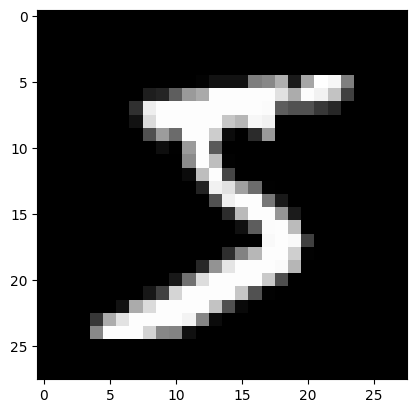

In [10]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.show()

In [11]:
import seaborn as sns

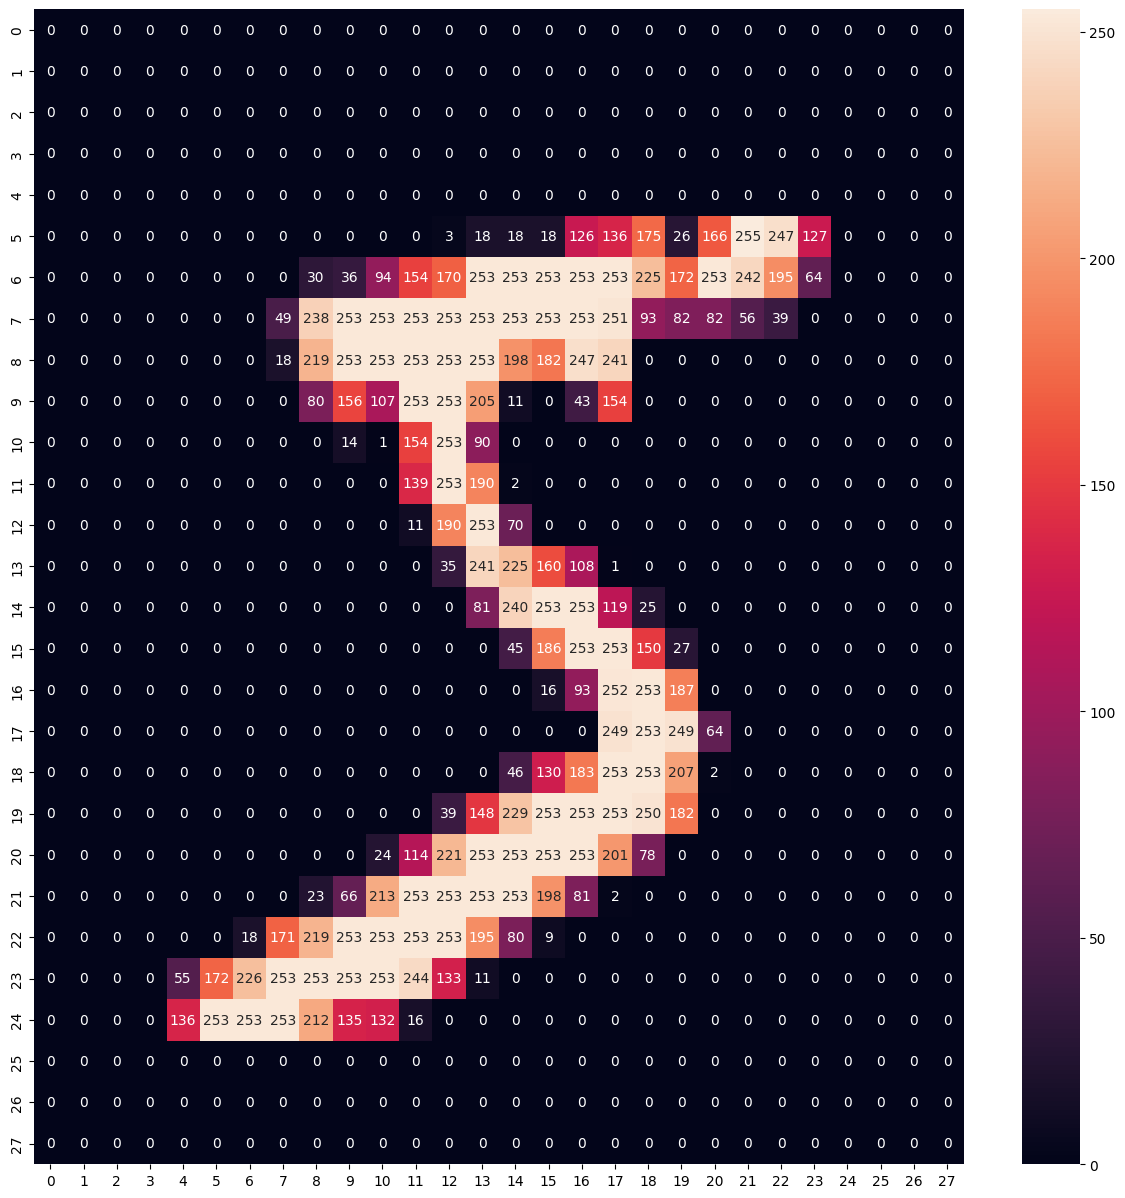

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

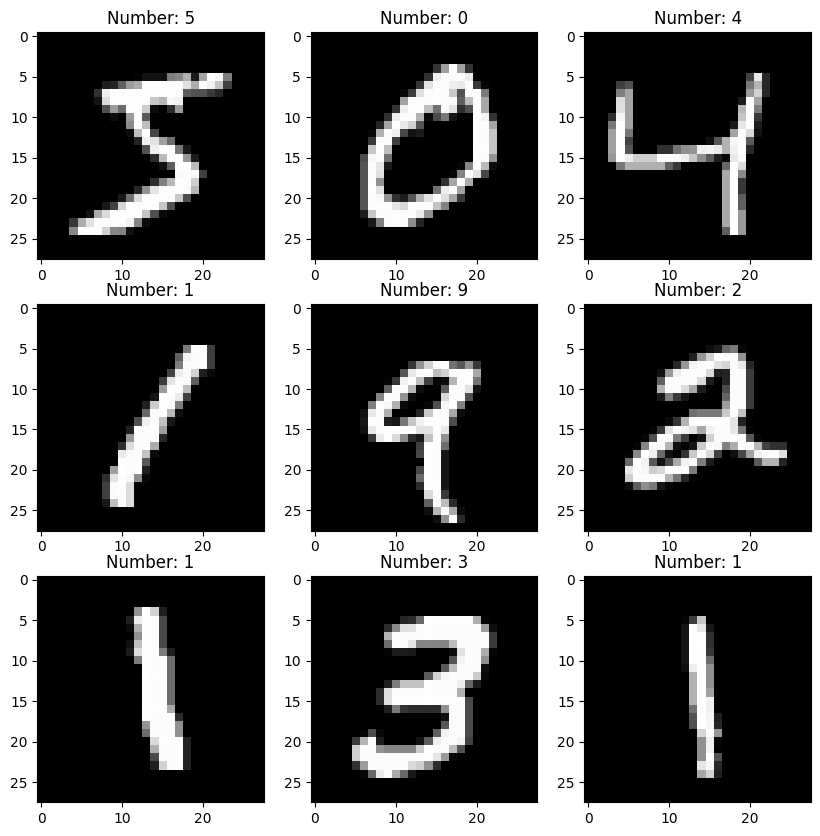

In [13]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i],cmap='gray')
    plt.title(f'Number: {ytrain[i]}')

In [14]:
xtrain_scl=xtrain.astype('float32')/255
xtest_scl=xtest.astype('float32')/255

In [15]:
import numpy as np

In [16]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
from keras.utils import to_categorical

In [18]:
ytrain_cat=to_categorical(ytrain)
ytest_cat=to_categorical(ytest)

In [19]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [20]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [27]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dropout,Dense

In [30]:
# Initialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(28,28,1)))

# Add convolution layer 1
model.add(Convolution2D(filters=32,activation='relu',kernel_size=(3,3)))
# We dont have to worry about the values in filter matrix

# Add max poolimg layer
model.add(MaxPool2D(pool_size=(2,2)))

# Add convolution layer 2
model.add(Convolution2D(filters=64,activation='relu',kernel_size=(3,3)))

# Add max poolimg layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Add a dropout layer
model.add(Dropout(0.5))

# Create a output layer
model.add(Dense(units=ytrain_cat.shape[1], activation='softmax'))

In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=15)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7810 - loss: 2.0455 - val_accuracy: 0.9735 - val_loss: 0.0993
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9487 - loss: 0.1688 - val_accuracy: 0.9800 - val_loss: 0.0625
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9628 - loss: 0.1254 - val_accuracy: 0.9820 - val_loss: 0.0688
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9655 - loss: 0.1131 - val_accuracy: 0.9827 - val_loss: 0.0537
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9677 - loss: 0.1058 - val_accuracy: 0.9809 - val_loss: 0.0654
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9704 - loss: 0.0972 - val_accuracy: 0.9837 - val_loss: 0.0501
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9732 - loss: 0.0898 - val_accuracy: 0.9851 - val_loss: 0.0485
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9749 - loss: 0.0817 - 

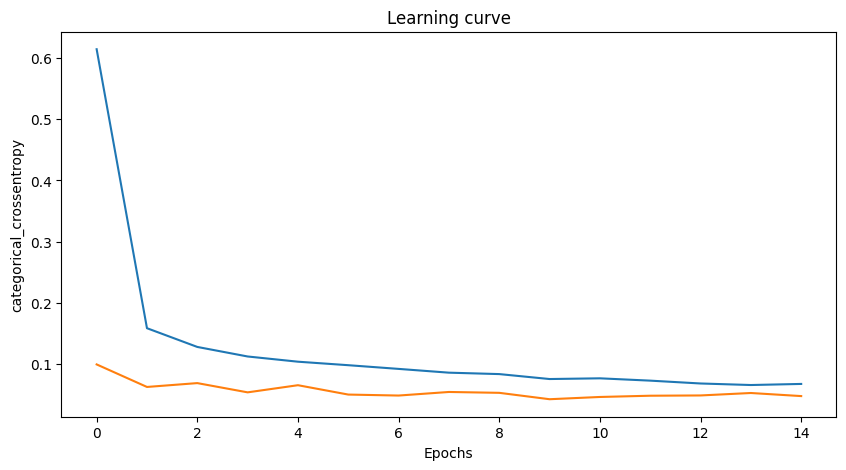

In [33]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('categorical_crossentropy')
plt.title('Learning curve')
plt.show()

In [34]:
model.evaluate(xtrain,ytrain_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9931 - loss: 0.0209


[0.02527032233774662, 0.9919999837875366]

In [35]:
yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [36]:
yprob_train[:5]

array([[2.1021283e-15, 5.1271650e-13, 2.8184285e-13, 3.8526999e-04,
        2.4414878e-13, 9.9961460e-01, 1.9133390e-14, 1.0068162e-09,
        6.5904091e-09, 1.1366944e-07],
       [9.9999940e-01, 8.3064345e-15, 2.2501669e-07, 1.6394300e-10,
        1.4399094e-10, 1.3896739e-10, 4.1816923e-09, 9.6613433e-11,
        4.3313202e-09, 3.9038375e-07],
       [3.7829611e-13, 2.3608568e-06, 4.2844501e-09, 2.5854782e-10,
        9.9907035e-01, 2.2487318e-11, 2.1875952e-12, 1.8439165e-05,
        8.5394794e-07, 9.0800790e-04],
       [1.4179546e-09, 9.9999022e-01, 1.7307353e-06, 4.2214404e-10,
        8.2865643e-07, 3.9292278e-10, 6.6977299e-09, 2.1137953e-06,
        4.9816690e-06, 1.0001083e-08],
       [2.6015194e-14, 1.5085877e-10, 1.9243457e-10, 1.9445705e-08,
        3.3584275e-04, 8.9055936e-09, 1.1325100e-14, 3.4422808e-07,
        9.0453024e-05, 9.9957329e-01]], dtype=float32)

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [39]:
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)


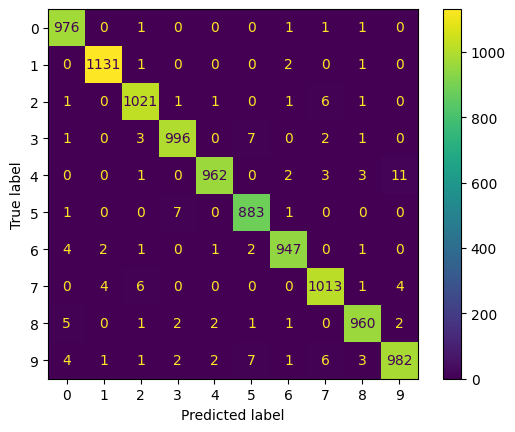

In [40]:
cf=confusion_matrix(ytest,ypred_test)
cfd=ConfusionMatrixDisplay(cf)
cfd.plot()